# Week3 - Homework

Write a rule based predictor for the dataset below.

Choose one of the following datasets and do your EDA.
Test your assumptions.

Finally write your code in `predict_one` function.

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'
in_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/in_names.csv'

df = pd.read_csv(in_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6000 non-null   object
 1   gender  6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [2]:
df.gender.value_counts()

gender
M    3000
F    3000
Name: count, dtype: int64

### Two examples:

In [3]:
df['is_last_letter_vowel'] = [ 'aeiou'.find(name[-1])>0 for name in df.name]

<Axes: xlabel='is_last_letter_vowel', ylabel='count'>

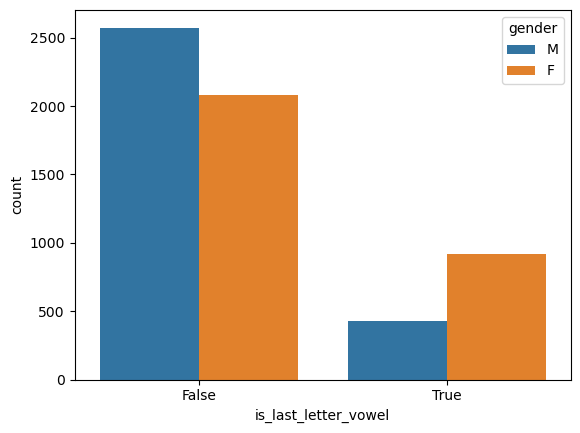

In [4]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

It looks like last letter is being a vowel is not a good indicator for this dataset!

<Axes: xlabel='len', ylabel='count'>

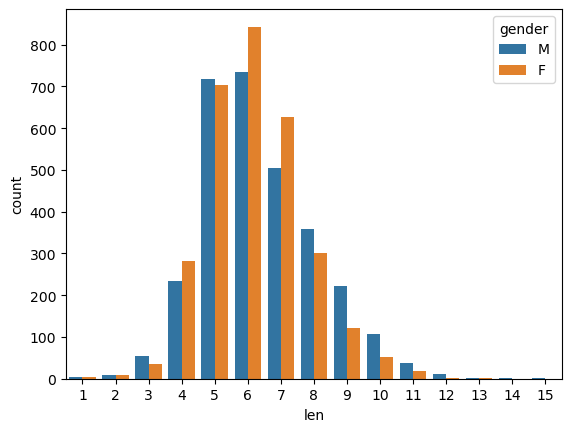

In [5]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

Seems like length doesn't also seem like a good separator

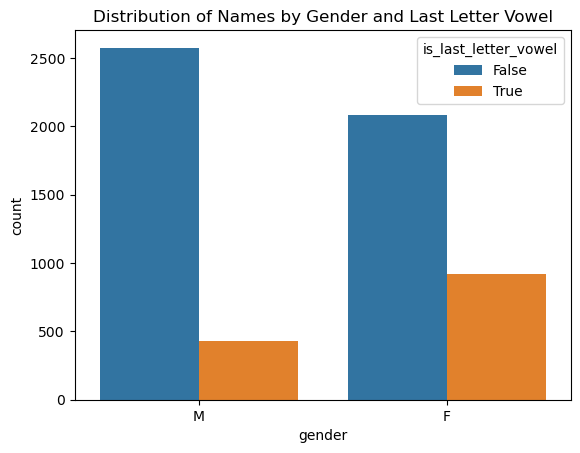

In [6]:
sns.countplot(data=df, x='gender', hue='is_last_letter_vowel')
plt.title('Distribution of Names by Gender and Last Letter Vowel')
plt.show()

In [7]:
df['last_letter'] = df['name'].str[-1]

last_letter_df = df.groupby(['last_letter', 'gender']).size().unstack(fill_value=0)
last_letter_df['total'] = last_letter_df['F'] + last_letter_df['M']
last_letter_df['female_percentage'] = last_letter_df['F'] / last_letter_df['total']
last_letter_df['male_percentage'] = last_letter_df['M'] / last_letter_df['total']

print(last_letter_df)

gender          F    M  total  female_percentage  male_percentage
last_letter                                                      
M               0    1      1           0.000000         1.000000
a            1277  266   1543           0.827609         0.172391
b              15   57     72           0.208333         0.791667
c               2    1      3           0.666667         0.333333
d              13  149    162           0.080247         0.919753
e              35   41     76           0.460526         0.539474
f               3   25     28           0.107143         0.892857
g               2    8     10           0.200000         0.800000
h              72  286    358           0.201117         0.798883
i             706  217    923           0.764897         0.235103
j              27   86    113           0.238938         0.761062
k              15   67     82           0.182927         0.817073
l              89  255    344           0.258721         0.741279
m         

In [11]:
def predict_one(name): # DON'T CHANGE THIS LINE
    last_letter = name[-1].lower()
    
    female_percentage = last_letter_df.loc[last_letter, 'female_percentage']
    
    if female_percentage > 0.50:
        return 'F'
    else:
        return 'M'

# Examples
print(predict_one('Sheela'))
print(predict_one('Rangarajan'))


F
M


In [12]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7595
